# ** SKILL GAP ANALYSIS **

In [1]:
# Import data manipulation library
import pandas as pd
import numpy as np

# import data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import file
df = pd.read_csv("skill gap analysis response csv.csv")

In [3]:
df.sample(frac=1)

,Full Name,Age,Current status,Degree/Program,Field / Domain of interest,Have you completed any internships or real-world projects?,How would you rate your technical skills,How would you rate your communication skills,How confident are you in attending interviews?,Do you feel your degree prepared you for jobs?,Have you attended any mock interviews or job preparation sessions?,Have you taken any certification courses or self-learning?,Do you think companies should test more on skills than degrees?,What is your biggest challenge in getting a job?,What would help you the most right now?,"Any suggestions for colleges, training institutes, or job platforms to help improve student and job-seeker readiness?"
38,Disha Mangesh Suryawanshi,18 - 25,Recently graduated,BCA,Data Science / Analytics,No,4,5,4,Partially,No,Yes,Yes,Lack of experience,"Technical training, Internship/project experience",NaN
43,Surya,18 - 25,Final year student,BE,IT/ Software,Yes,4,4,3,Partially,Yes,Yes,Yes,Fear of interviews,Resume/interview preparation,NaN
65,Suma,18 - 25,Final year student,BBM,Marketing,No,3,4,3,Yes,No,No,No,Lack of technical skills,Technical training,NaN
34,Shadaf sanadi,18 - 25,Working professional (less than 2 years of exp...,BE,Data Science / Analytics,Yes,5,5,5,No,No,Yes,Yes,Weak resume,"Technical training, Communication/soft skills",Ntg
53,Surya Gowda,18 - 25,Final year student,BE(Computer Science),IT/ Software,Yes,4,4,4,Partially,Yes,Yes,Yes,Lack of Opportunities,Mentorship/guidance,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,Anil Kumar,18 - 25,Recently graduated,BCA,Data Science / Analytics,No,3,3,3,Partially,No,No,No,Lack of technical skills,Technical training,NaN
4,Aditya Chandgude,18 - 25,"Recently graduated, Looking for a job (fresher)",E commerce and digital marketing and business ...,"Data Science / Analytics, Marketing",Yes,4,5,5,Partially,Yes,Yes,Yes,Lack of experience,"Resume/interview preparation, Internship/proje...",NaN
78,Rutvi Saraf,26 - 35,Looking for a job (experienced),MBA,Finance,Yes,4,4,4,Partially,Yes,No,Yes,Lack of technical skills,Technical training,NaN
58,Veena,18 - 25,Final year student,B.Tech,IT/ Software,Yes,4,3,4,Partially,Yes,Yes,Yes,Poor communication/confidence,Communication/soft skills,"Give training on Communication / Soft skill , ..."


In [4]:
# Checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 16 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                     --------------  ----- 
 0   Full Name                                                                                                                  76 non-null     object
 1   Age                                                                                                                        81 non-null     object
 2   Current status                                                                                                             81 non-null     object
 3   Degree/Program                                                                                                             81 non-null   

In [5]:
# finding missing values
df.isnull().sum()/len(df)*100

Full Name                                                                                                                     6.172840
Age                                                                                                                           0.000000
Current status                                                                                                                0.000000
Degree/Program                                                                                                                0.000000
Field / Domain of interest                                                                                                    0.000000
  Have you completed any internships or real-world projects?                                                                  0.000000
How would you rate your technical skills                                                                                      0.000000
How would you rate your communication skills           

In [6]:
df.drop(columns=['  Any suggestions for colleges, training institutes, or job platforms to help improve student and job-seeker readiness?  '],inplace=True,axis=1)

In [7]:
# segregate categorical and numerical column
numerical_col = df.select_dtypes(exclude=object)
categorical_col = df.select_dtypes(include=object)

In [8]:
numerical_col.shape

(81, 3)

In [9]:
categorical_col.shape

(81, 12)

In [10]:
# simple imputer
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='most_frequent')

for i in categorical_col.columns:
    df[i] = si.fit_transform(df[[i]]).ravel()

In [11]:
# EDA
from collections import OrderedDict
stats = []

for i in numerical_col.columns:
    numerical_stats = OrderedDict({
        'Features':i,
        'Count':df[i].count(),
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
        'Std Devition':df[i].std(),
        'Skewness':df[i].skew(),
        'Kurtosis':df[i].kurt()
    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report

,Features,Count,Mean,Median,Q1,Q3,IQR,Std Devition,Skewness,Kurtosis
0,How would you rate your technical skills,81,3.691358,4.0,3.0,4.0,1.0,0.735561,-0.403866,0.108012
1,How would you rate your communication skills,81,3.777778,4.0,3.0,4.0,1.0,0.689202,0.086999,-0.457347
2,How confident are you in attending interview...,81,3.666667,4.0,3.0,4.0,1.0,0.821584,-0.138664,0.255328


In [12]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in categorical_col.columns:
    df[i] = le.fit_transform(df[i])

# ** Machine Learning **

In [13]:
# Split X and y
X = df.drop(columns=['Do you feel your degree prepared you for jobs?'])
y = df['Do you feel your degree prepared you for jobs?']

In [14]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
# Target column values
df['Do you feel your degree prepared you for jobs?'].value_counts()

Do you feel your degree prepared you for jobs?
1    48
0    21
2    12
Name: count, dtype: int64

In [16]:
# Balance the imbalance data
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train,y_train = sm.fit_resample(X_train,y_train)

In [19]:
pd.Series(y_train).value_counts()

Do you feel your degree prepared you for jobs?
1    38
0    38
2    38
Name: count, dtype: int64

In [20]:
# Scaling Technique
from sklearn.preprocessing import RobustScaler
RS = RobustScaler()
X_test = RS.fit_transform(X_test)
X_train = RS.transform(X_train)

# Model Building

In [22]:
# Tree Based Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RF = RandomForestClassifier().fit(X_train,y_train)
y_pred_rf = RF.predict(X_test)
accuracy_score(y_test,y_pred_rf)


0.47058823529411764

In [24]:
# Navie Bayes
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB().fit(X_train,y_train)
y_pred_BNB = BNB.predict(X_test)
accuracy_score(y_test,y_pred_BNB)

0.47058823529411764

In [26]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier().fit(X_train,y_train)
y_pred_KNN = KNN.predict(X_test)
accuracy_score(y_test,y_pred_KNN)

0.47058823529411764

In [29]:
# SVM
from sklearn.svm import SVC
svc = SVC(degree= 3).fit(X_train,y_train)
y_pred_svm = svc.predict(X_test)
accuracy_score(y_test,y_pred_svm)

0.47058823529411764

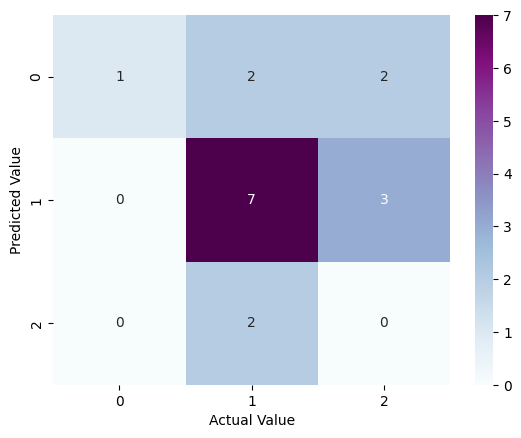

In [32]:
# confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred_svm),annot=True,cmap='BuPu')
plt.xlabel("Actual Value")
plt.ylabel('Predicted Value')
plt.show()

In [31]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.64      0.70      0.67        10
           2       0.00      0.00      0.00         2

    accuracy                           0.47        17
   macro avg       0.55      0.30      0.33        17
weighted avg       0.67      0.47      0.49        17

